<a href="https://colab.research.google.com/github/Khushibung05/KMeans/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix




from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Mounted at /content/drive
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
x = df.iloc[:,[3,4]].values



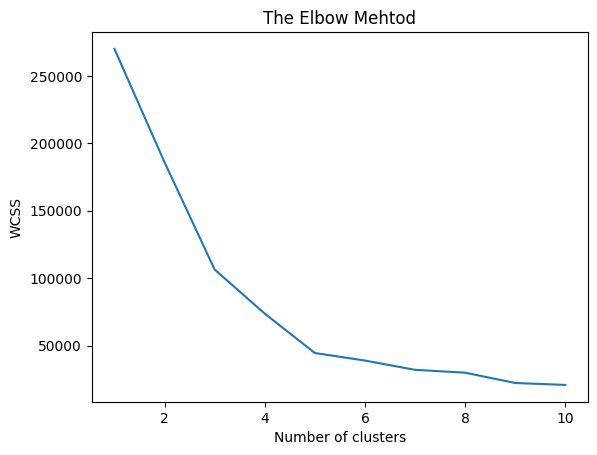

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Mehtod")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

🔹 What is the Elbow Method?

The Elbow Method is a technique to find the optimal number of clusters (K) in K-Means.

📌 Problem

K-Means requires K as input, but:

How do we know the best value of K?

👉 Elbow Method answers this.

🔹 What is WCSS?

WCSS = Within-Cluster Sum of Squares

Measures how compact the clusters are

Formula (conceptual):

Sum of squared distances between each point and its cluster centroid

✔ Lower WCSS = tighter clusters

🔹 How Elbow Method Works

Run K-Means for different values of K (e.g., 1 to 10)

Calculate WCSS for each K

Plot:

X-axis → K (number of clusters)

Y-axis → WCSS

Observe the curve

🔹 How Do We Select K Using Elbow Method?
📌 Key Idea

Choose K at the point where the rate of decrease in WCSS sharply slows down

This point looks like an elbow (bend) in the graph.

🔎 Interpretation

Before elbow → adding clusters significantly improves grouping

After elbow → improvement becomes marginal

✔ Elbow point = Optimal K

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)#k=5
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

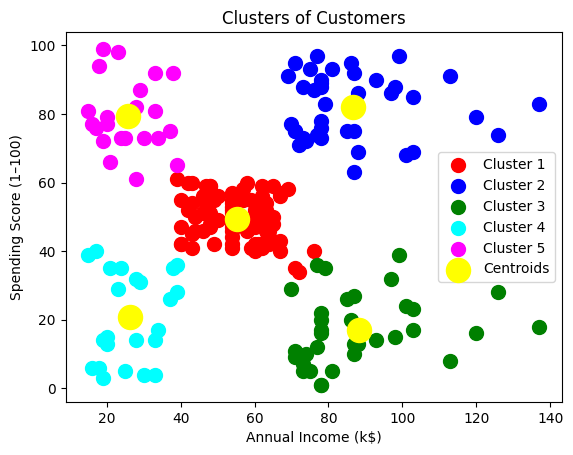

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s=100, c='red', label='Cluster 1')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s=100, c='blue', label='Cluster 2')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s=100, c='green', label='Cluster 3')

plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],
            s=100, c='cyan', label='Cluster 4')

plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1],
            s=100, c='magenta', label='Cluster 5')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()

###**Wholesale customers data**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix




from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Wholesale customers data.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
df_spend = df.drop(['Channel', 'Region'], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_spend)


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


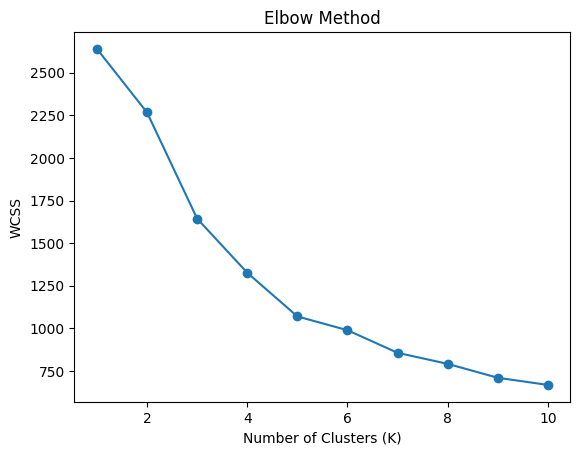

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


Observation

Sharp decrease till K = 3

After that, improvement slows

✅ Optimal K = 3

Reason:
Adding more clusters after 3 does not significantly reduce WCSS → diminishing returns.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


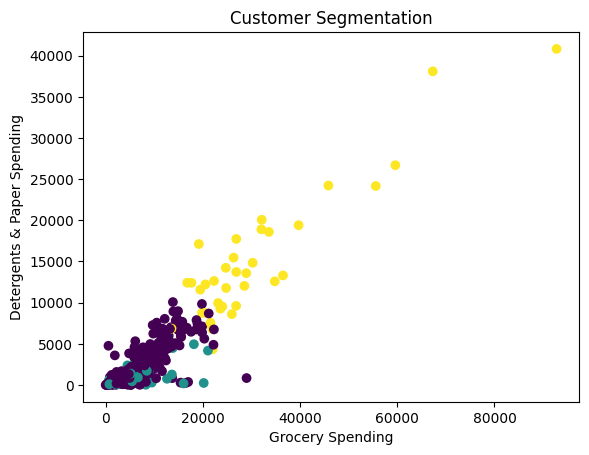

In [ ]:
plt.figure()
plt.scatter(
    df['Grocery'],
    df['Detergents_Paper'],
    c=df['Cluster']
)
plt.xlabel("Grocery Spending")
plt.ylabel("Detergents & Paper Spending")
plt.title("Customer Segmentation")
plt.show()


Interpretation

Customers with similar spending fall into same color groups

Clear separation visible between clusters

In [ ]:
#Cluster Profiling
#Average Spending per Cluster
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.282857,2.534286,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,1.113208,2.698113,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,2.000000,2.405405,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351


Cluster Summary
🔹 Cluster 0 – High-Volume Retail Buyers

Very high Grocery & Detergents spending

Likely supermarkets or large retailers

🔹 Cluster 1 – Low-Volume Customers

Low spending across all categories

Small cafés or independent buyers

🔹 Cluster 2 – Fresh & Frozen Focused

High Fresh & Frozen purchases

Hotels and restaurants

In [ ]:
#Stability Check (Different Random State)
kmeans2 = KMeans(n_clusters=3, random_state=99)
df['Cluster_2'] = kmeans2.fit_predict(X_scaled)

(df['Cluster'] == df['Cluster_2']).value_counts()

,count
True,383
False,57


####Observation

Majority of assignments remain similar

Minor shifts may occur